In [1248]:
# Import Packages
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [1249]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [1250]:
# Load Data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

In [1251]:
cust_filter = data['cust_id'] == 'klant_266'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

data['procesdag']=pd.to_datetime(data['procesdag'])
data = data.set_index(data.procesdag, drop=True)
data = data['2016-01-01':'2018-01-01']

In [1252]:
data.head()

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
procesdag,,,,,
2016-01-01,2016-01-01,klant_266,0.0,0.0,train
2016-01-04,2016-01-04,klant_266,172.0,44.0,train
2016-01-05,2016-01-05,klant_266,44.0,54.0,train
2016-01-06,2016-01-06,klant_266,54.0,53.0,train
2016-01-07,2016-01-07,klant_266,53.0,43.0,train


In [1253]:
data.drop(['procesdag'], axis='columns', inplace=True)

In [1254]:
data.head()

,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
procesdag,,,,
2016-01-01,klant_266,0.0,0.0,train
2016-01-04,klant_266,172.0,44.0,train
2016-01-05,klant_266,44.0,54.0,train
2016-01-06,klant_266,54.0,53.0,train
2016-01-07,klant_266,53.0,43.0,train


In [1255]:
data.drop(['aantal_pakketten_volgende_dag'], axis='columns', inplace=True)

In [1256]:
data.head()

,cust_id,aantal_pakketten,validation_column
procesdag,,,
2016-01-01,klant_266,0.0,train
2016-01-04,klant_266,172.0,train
2016-01-05,klant_266,44.0,train
2016-01-06,klant_266,54.0,train
2016-01-07,klant_266,53.0,train


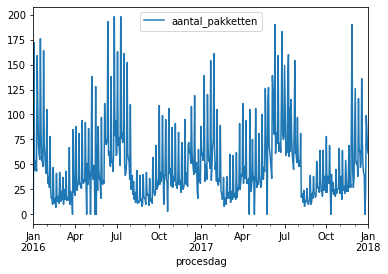

In [1257]:
data.plot()

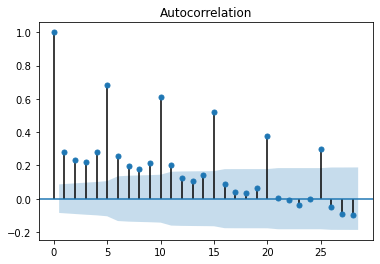

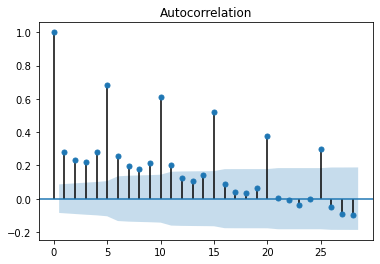

In [1258]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['aantal_pakketten'])

In [1259]:
data_diff = data['aantal_pakketten'].diff()

In [1260]:
data_diff=data_diff[1:]
data_diff.head()

procesdag
2016-01-04    172.0
2016-01-05   -128.0
2016-01-06     10.0
2016-01-07     -1.0
2016-01-08    -10.0
Name: aantal_pakketten, dtype: float64

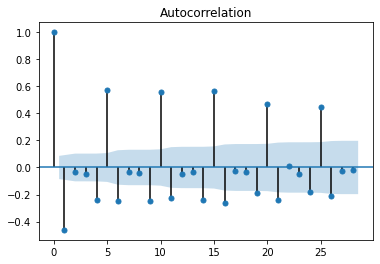

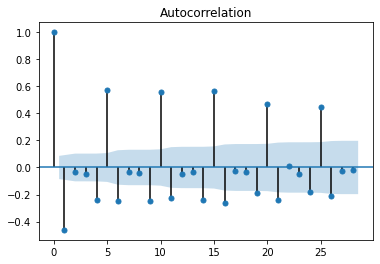

In [1261]:
plot_acf(data_diff)

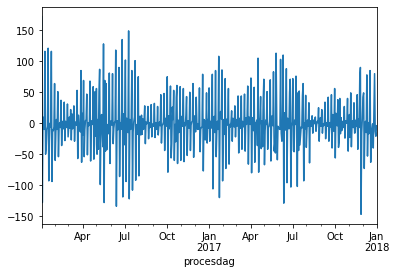

In [1262]:
data_diff.plot()

In [1263]:
X= data['aantal_pakketten'].values
train= X [0:500] # 500 data train
test = X[500:] #22 test data
predictions = []



# AR Model


In [1264]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar= AR(train)
model_ar_fit=model_ar.fit()

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWa

In [1265]:
predictions=model_ar_fit.predict(start=499, end=522)

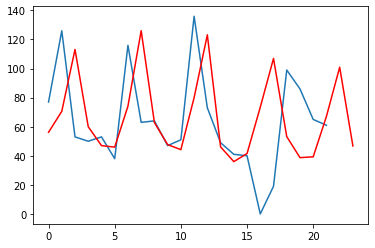

In [1266]:
plt.plot(test)
plt.plot(predictions, color= 'red')

# arima

In [1267]:
from statsmodels.tsa.arima_model import ARIMA

In [1268]:
model_arima = ARIMA(train,order=(1,1,1))
model_arima_fit=model_arima.fit()

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel

In [1269]:
predictions=model_arima_fit.predict(start=499, end=522)
predictions

array([34.77293565, 21.45970995, -2.07331554,  0.15335346, -0.05733152,
       -0.03739674, -0.03928294, -0.03910447, -0.03912136, -0.03911976,
       -0.03911991, -0.0391199 , -0.0391199 , -0.0391199 , -0.0391199 ,
       -0.0391199 , -0.0391199 , -0.0391199 , -0.0391199 , -0.0391199 ,
       -0.0391199 , -0.0391199 , -0.0391199 , -0.0391199 ])

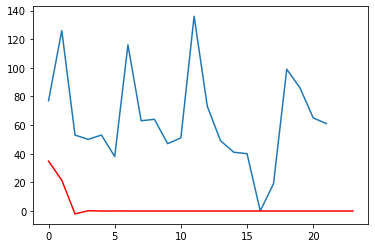

In [1270]:
plt.plot(test)
plt.plot(predictions, color= 'red')